# Classificação do IDH

Seguindo as classes de classificação abaixo nós utilizamos a árvore de decisão ID3 para classificar a coluna IDM

    0,800 – 1,000 (muito alto)
    0,700 – 0,799 (alto)
    0,555 – 0,699 (médio)
    0,350 – 0,554 (baixo)
    0,0 – 0,349 (muito baixo)

O target ou variável independente `y` foi a coluna `IDHM`.

As variáveis dependentes `x` foram as respectivas colunas `PopEstimada_2018`, `PopCenso_2010`, `ReceitasRealizadas_2014`, `DespesasEmpenhadas_2014`, `Pib_2014`, `RegiaoBrasil_CO`, `RegiaoBrasil_N`, `RegiaoBrasil_NE`, `RegiaoBrasil_SE` e `RegiaoBrasil_SUL`.

Sendo as últimas 5 colunas geradas através do `get_dummies` para normalizar o valor das strings.


In [282]:
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

columns=['PopEstimada_2018','PopCenso_2010','IDHM','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','Pib_2014','RegiaoBrasil_CO','RegiaoBrasil_N','RegiaoBrasil_NE','RegiaoBrasil_SE','RegiaoBrasil_SUL']

In [283]:
# Carregando os datos formatados
data = pd.read_csv (r'data/DATA_F.csv')
df = pd.DataFrame(data, columns=columns)
df

,PopEstimada_2018,PopCenso_2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014,RegiaoBrasil_CO,RegiaoBrasil_N,RegiaoBrasil_NE,RegiaoBrasil_SE,RegiaoBrasil_SUL
0,23167,24392,3,53490,47577,16461.11,0,1,0,0,0
1,5438,6313,3,22635,19354,18346.17,0,1,0,0,0
2,84813,78574,4,169636,155473,20725.23,0,1,0,0,0
3,16444,17029,3,53147,46774,22179.17,0,1,0,0,0
4,16227,18591,3,34612,34381,15300.88,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4613,13746,12548,4,37777,33220,23237.24,1,0,0,0,0
4614,8611,7371,3,26783,23511,39480.36,1,0,0,0,0
4615,6026,4735,3,17295,15646,18992.37,1,0,0,0,0
4616,5758,5145,3,19148,16785,35691.39,1,0,0,0,0


In [284]:
# Embaralhando dados
df = df.sample(frac = 1).reset_index(drop = True)

# Removendo a coluna IDHM do dataset e a transformando no target
target = df.pop('IDHM')

# Representando as strings como inteiros 
target = target.astype('int')

# Treino 90% e teste 10%
qtd_treino = int(len(df) * 0.9)
x_treinamento = df[:qtd_treino]
x_teste = df[qtd_treino:]
y_treinamento = target[:qtd_treino]
y_teste = target[qtd_treino:]
df

,PopEstimada_2018,PopCenso_2010,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014,RegiaoBrasil_CO,RegiaoBrasil_N,RegiaoBrasil_NE,RegiaoBrasil_SE,RegiaoBrasil_SUL
0,31142,28751,48888,32323,18396.27,0,0,0,0,1
1,5323,5045,13569,11458,6591.32,0,0,1,0,0
2,13214,12005,24989,23433,6411.88,0,0,1,0,0
3,46039,42361,113206,116199,26504.71,1,0,0,0,0
4,121198,104150,213243,183827,33690.20,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4613,1611,1598,14968,12237,43986.03,0,0,0,0,1
4614,16451,13794,34433,34629,4281.38,0,0,1,0,0
4615,21000,20452,37325,35441,7601.86,0,0,1,0,0
4616,33224,30766,67768,57672,24302.08,1,0,0,0,0


In [285]:
# Árvore de decisão com o critério de entropia
clf = tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20, class_weight='balanced')

In [286]:
# Treinamento
irisTree = clf.fit(x_treinamento, y_treinamento)

In [287]:
# Predição
y_pred = irisTree.predict(x_teste)

In [288]:
print(y_pred)
print(y_teste)

[3 3 4 4 5 2 4 2 4 5 2 2 3 3 4 4 4 3 2 4 3 4 4 5 3 2 3 4 3 4 4 4 2 4 3 3 4
 2 4 3 4 3 2 2 4 2 2 3 3 4 4 3 3 4 4 4 4 3 2 2 2 4 3 2 4 2 4 4 4 5 4 4 4 4
 4 2 3 4 5 4 3 4 4 4 3 2 4 3 3 4 4 4 2 4 2 2 4 2 3 4 2 3 3 4 4 4 4 4 3 4 4
 2 2 4 2 3 3 4 3 2 3 3 2 3 2 4 2 2 2 2 4 3 2 4 2 4 4 4 2 4 2 3 3 4 2 3 4 4
 5 4 4 4 2 2 4 3 4 4 3 4 3 2 3 4 4 2 3 3 2 4 4 2 3 2 4 4 2 4 4 4 2 4 4 4 3
 3 4 2 4 4 4 5 4 2 3 3 5 3 4 2 4 2 4 3 3 2 4 3 2 2 4 4 3 5 2 4 4 4 3 4 4 4
 3 3 3 4 2 3 4 3 4 4 2 3 4 5 2 3 3 3 4 2 4 2 3 3 4 3 2 3 2 4 3 3 2 2 3 4 4
 4 4 3 4 4 4 3 2 4 3 2 3 4 4 4 2 2 3 4 4 4 3 4 2 4 4 5 4 4 4 3 2 4 3 4 4 3
 4 2 5 4 3 2 4 2 2 4 4 4 3 4 2 5 2 4 3 2 3 4 3 5 4 4 4 2 4 4 3 4 3 4 3 3 4
 4 4 4 3 2 3 4 4 2 2 4 4 3 2 2 4 4 3 3 4 4 3 4 2 4 4 4 3 2 3 4 4 2 2 2 5 2
 2 3 2 3 4 4 3 4 4 3 3 3 2 4 4 4 4 3 3 4 4 3 4 5 2 2 3 3 3 4 3 3 3 2 4 3 4
 4 3 4 4 3 2 4 4 4 5 4 4 3 4 3 4 4 4 4 2 4 2 3 2 4 4 4 3 3 2 4 4 4 4 5 3 3
 3 2 4 4 4 4 3 4 4 4 4 4 3 4 2 2 4 3]
4156    3
4157    3
4158    4
4159    4
4160    4
       ..
46

In [289]:
MC = confusion_matrix(y_teste, y_pred)
print(MC)

[[ 31   3   1   0]
 [ 73 106  72   1]
 [  0  17 141  15]
 [  0   0   0   2]]


In [290]:
print('Acuracia:', accuracy_score(y_teste, y_pred))
print('Precisão:', precision_score(y_teste, y_pred, average='micro'))
print('Recall:  ', recall_score(y_teste, y_pred, average='micro'))

Acuracia: 0.6060606060606061
Precisão: 0.6060606060606061
Recall:   0.6060606060606061


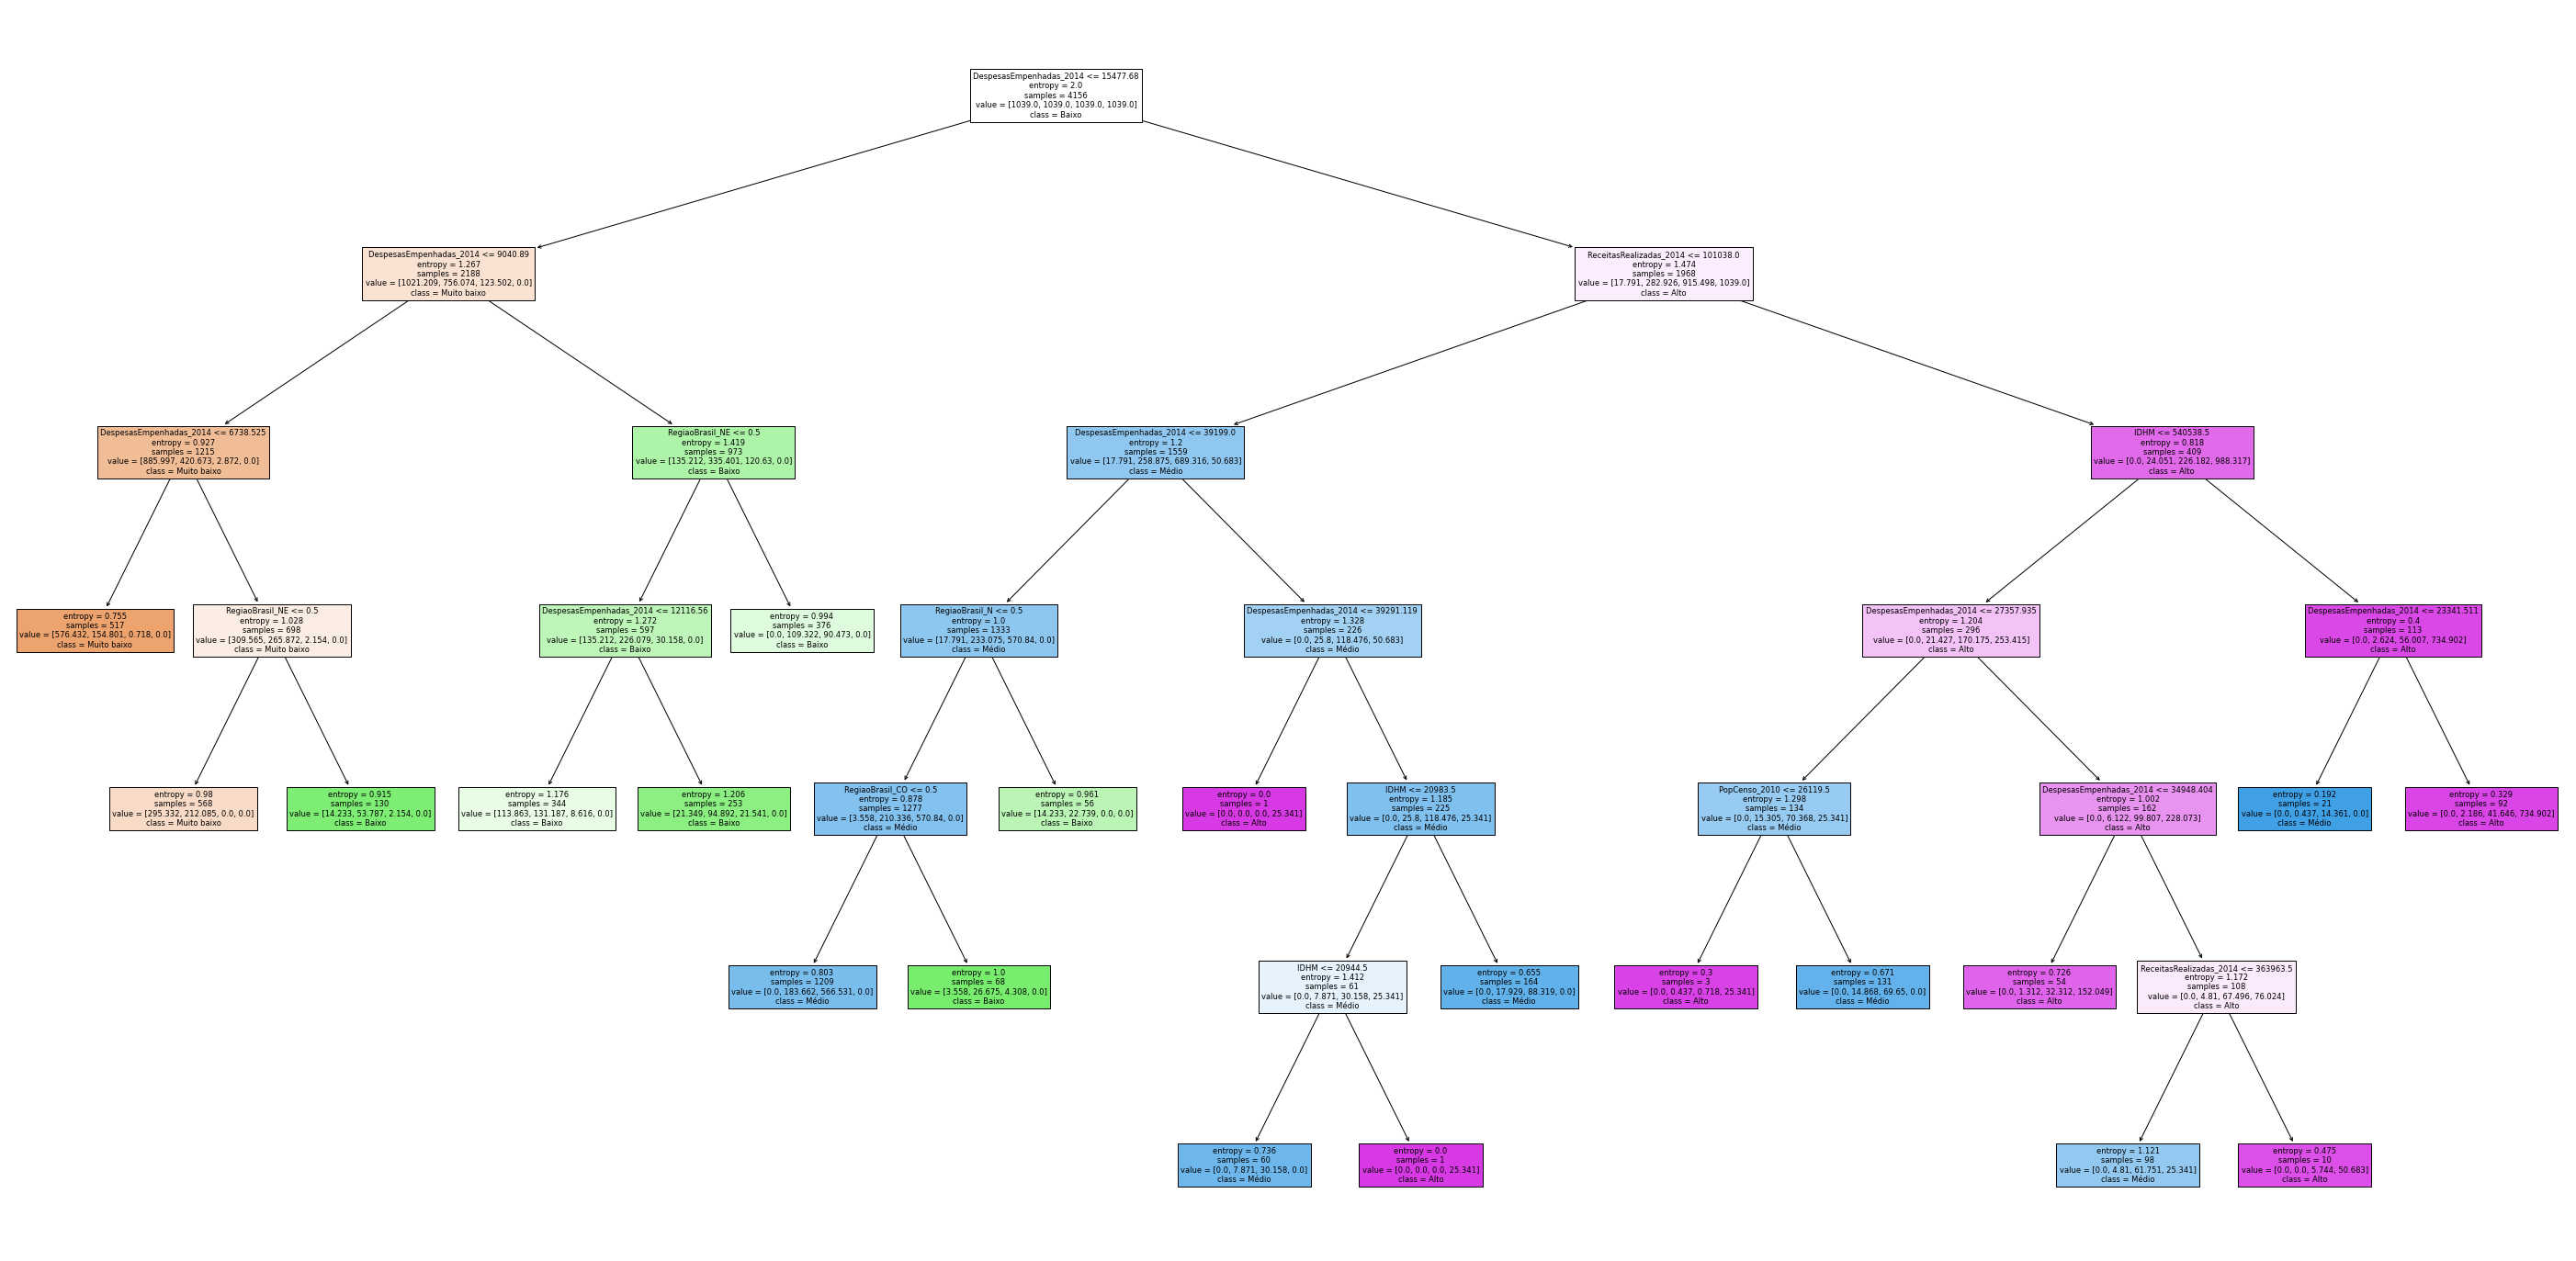

In [291]:
IDH_variations=['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
plt.figure(figsize=(50, 25))
tree.plot_tree(clf, filled=True, class_names=IDH_variations, feature_names=columns)
plt.savefig('src/tree.png', facecolor='white', edgecolor='none')

# Conclusão
Os valores encontrados foram relativamente satisfatórios, a árvore final possue diferentes resultados das classes criadas e os valores de Acurácia, Precisão e Recall ficaram no limite para serem descartados.